Photometry for GJ674

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Using code from my vot_to_phot.py script

In [5]:
phottab = 'GJ674_5as_vizier_votable.vot'

In [6]:
from astropy.io.votable import parse

In [7]:
votable = parse(phottab)
table = votable.get_first_table()
data = table.array

In [8]:
c = 2.998e8

In [9]:
mask = ~data['sed_eflux'].mask
masked_data = data[mask].data
filters = np.unique(masked_data['sed_filter'].data)
w = []
f = []
e = []
for filter in filters:
    w1 = 10.*c/np.mean(masked_data['sed_freq'][masked_data['sed_filter']==filter])
    fj1 = masked_data['sed_flux'][masked_data['sed_filter']==filter]
    e1 = masked_data['sed_eflux'][masked_data['sed_filter']==filter]
    if len(fj1) >1:
        fj_av = np.average(fj1, weights = (1/(e1**2)))
        e1_av = abs(np.average((fj1-fj_av), weights = (1/(e1**2))))**0.5
    else:
        fj_av, e1_av = fj1[0], e1[0]
    f1 = 2.99792458E-05*fj_av/(w1**2)
    w.append(w1)
    f.append(f1)
    e.append((e1_av*f1)/fj_av)

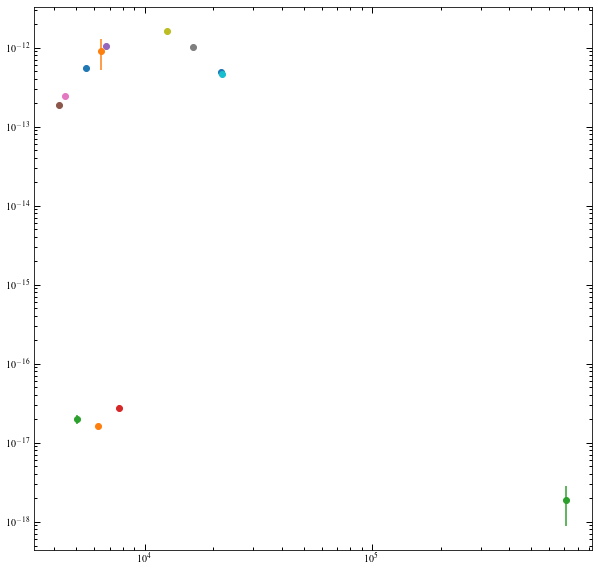

In [10]:
plt.figure('sed', figsize=(10,10))
for i in range(len(w)):
    if e[i] !=0.0:
        plt.errorbar(w[i], f[i], yerr=e[i], marker='o', ls='none', label = filters[i])
    #else:
     #   plt.errorbar(w[i], f[i], yerr=f[i]*0.1, marker='o', ls='none', uplims=True,label = filters[i])
plt.yscale('log')
plt.xscale('log')
#plt.legend()

In this case I don't want to average the repeats as the star is variable.

In [11]:
filters

array([b'2MASS:H', b'2MASS:J', b'2MASS:Ks', b'GAIA/GAIA2:G',
       b'GAIA/GAIA2:Gbp', b'GAIA/GAIA2:Grp', b'Gaia:G', b'HIP:BT',
       b'HIP:VT', b'Johnson:B', b'Johnson:H', b'Johnson:J', b'Johnson:K',
       b'Johnson:V', b'POSS-II:F', b'Spitzer/MIPS:70'], dtype='|S32')

In [12]:
mw = fits.getdata('../PHOENIX/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits',0)
mf = fits.getdata('../PHOENIX/lte03400-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')

(1e-16, 1e-11)

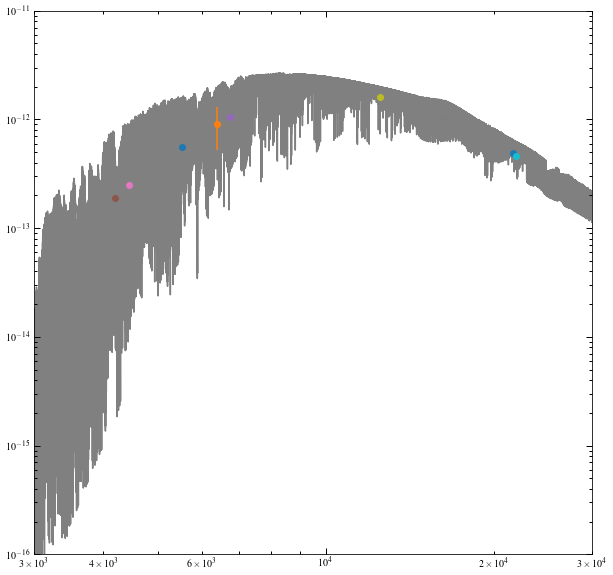

In [13]:
plt.figure('sed', figsize=(10,10))
for i in range(len(w)):
    if e[i] !=0.0:
        plt.errorbar(w[i], f[i], yerr=e[i], marker='o', ls='none', label = filters[i])
plt.yscale('log')
plt.xscale('log')
plt.plot(mw, mf*4e-26, zorder=-100, c='0.5')
plt.xlim(3000, 30000)
plt.ylim(1e-16, 1e-11)

In [75]:

print(filters)

[b'2MASS:H' b'2MASS:J' b'2MASS:Ks' b'GAIA/GAIA2:G' b'GAIA/GAIA2:Gbp'
 b'GAIA/GAIA2:Grp' b'Gaia:G' b'HIP:BT' b'HIP:VT' b'Johnson:B' b'Johnson:H'
 b'Johnson:J' b'Johnson:K' b'Johnson:V' b'POSS-II:F' b'Spitzer/MIPS:70']


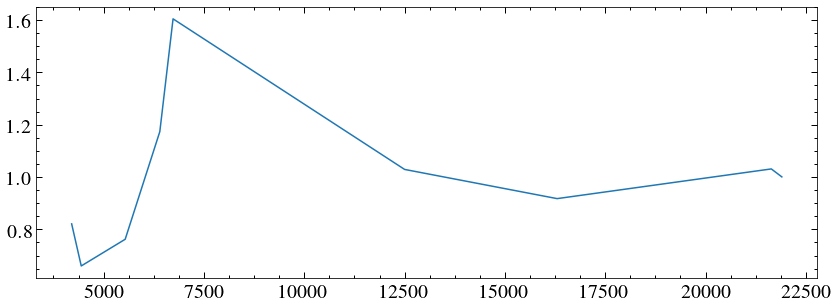

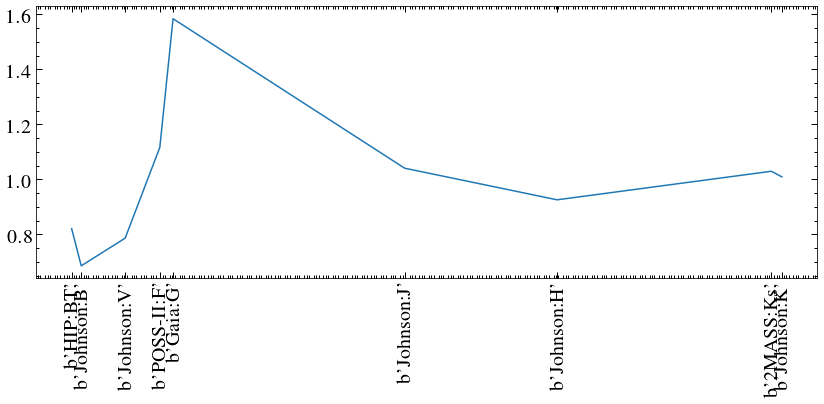

In [83]:
scales_mean = []
scales_median = []
w_abs = []
flt = []
for i in range(len(w)):
    if e[i] >0.0 and w[i] < mw[-1] and b'GAIA/GAIA2' not in filters[i]:
        wi = w[i]
        m_slice= (mw > wi-10.) & (mw <wi+10.)
        f_slice = mf[m_slice]
        scales_mean.append(f[i]/np.mean(f_slice))
        scales_median.append(f[i]/np.median(f_slice))
        w_abs.append(wi)
        flt.append(filters[i])
    
w_abs = np.array(w_abs) 
flt = np.array(flt)
#w_abs = np.array(w)[(np.array(e)>0.0)&(w<mw[-1])]
#flt = filters[(np.array(e)>0.0)&(w<mw[-1])]
arr1inds = w_abs.argsort()
w_abs = w_abs[arr1inds]
scales_mean = np.array(scales_mean)[arr1inds]
scales_median = np.array(scales_median)[arr1inds]
flt = flt[arr1inds]

#print(w_abs)
#plt.plot(w_abs, scales_mean/scales_median)
#plt.axhline(1, c='r')
#plt.show()
#scales = scales_median*1e26
plt.plot(w_abs, scales_median/np.mean(scales_median))
#plt.xticks(w_abs, flt, rotation = 'vertical')
plt.show()

plt.plot(w_abs, scales_mean/np.mean(scales_mean))
plt.xticks(w_abs, flt, rotation = 'vertical')
plt.show()


(1e-16, 1e-11)

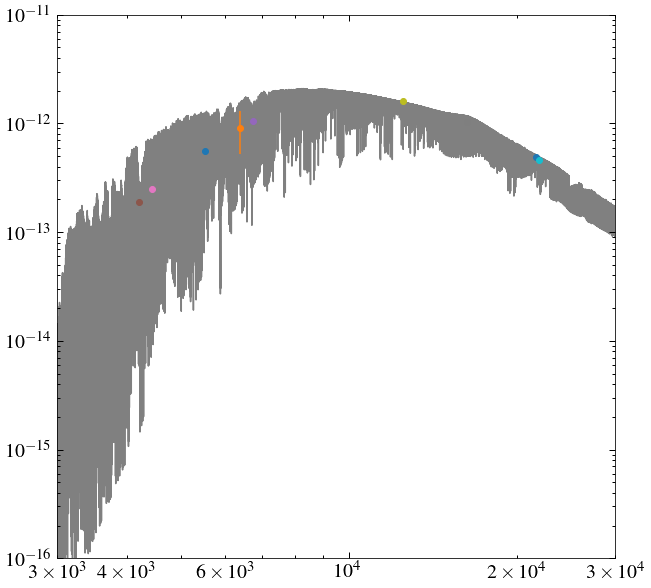

In [86]:
plt.figure('sed', figsize=(10,10))
for i in range(len(w)):
    if e[i] !=0.0:
        plt.errorbar(w[i], f[i], yerr=e[i], marker='o', ls='none', label = filters[i])
plt.yscale('log')
plt.xscale('log')
plt.plot(mw, mf*np.mean(scales_median), zorder=-100, c='0.5')
plt.xlim(3000, 30000)
plt.ylim(1e-16, 1e-11)